# Huffman Compression Algorithm Test

In [7]:
import os
import heapq
import matplotlib.pyplot as plt
import random

## Node 
### We create a node to use it in our tree

In [8]:
class Node:
    def __init__(self, char, fq):
        self.fq = fq
        self.char = char
        self.right_son = None
        self.left_son = None

#     def __cmp__(self, other):
#         if other == None:
#             return -1
#         if(not isinstance(other, Node)):
#             return -1
        
#         return self.fq > other.fq
    
    def __lt__(self, other):
        return self.fq > other.fq

## Huffman Algorithm Class

### In this class, we create all the steps in the huffman algorithm, starting at the frequency dictionary and ending at the compress/decompress functions

In [9]:
class Huffman:
    def __init__(self, path):
        self.path = path
        self.heap = []
        self.codes = {}
        self.decript_map = {}

    def frequency_dict(self, txt):
        frequency = {}
        for c in txt:
            if c not in frequency:
                frequency[c] = 0
            frequency[c] += 1
        return frequency

    def create_heap(self, f):
        for c in f:
            node = Node(c, f[c])
            heapq.heappush(self.heap, node)

    def merge(self):
        while(len(self.heap) > 1):
            n_1 = heapq.heappop(self.heap)
            n_2 = heapq.heappop(self.heap)

            merged_node = Node(None, n_1.fq + n_2.fq)
            merged_node.left_son = n_1
            merged_node.right_son = n_2

            heapq.heappush(self.heap, merged_node)


    
    def make_codes(self, root, c_code):
        if root == None:
            return 

        if root.char != None:
            self.codes[root.char] = c_code
            self.decript_map[c_code] = root.char
        
        self.make_codes(root.left_son, c_code + '0')
        self.make_codes(root.right_son, c_code + '1')

    def code_caller(self):
        c_code = ''
        root = heapq.heappop(self.heap)
        self.make_codes(root, c_code)

    def encoded_txt(self, txt):
        encoded = ''
        for c in txt:
            encoded += self.codes[c]
        return encoded

    def encoded_txt_compression_helper(self, encoded):
        "Add 0's in lines with number of bits not divisible by 8"
        added = 8 - len(encoded) % 8
        
        for i in range(added):
            encoded += "0"
        
        info = "{0:08b}".format(added)
        encoded = info + encoded
        return encoded
    
    def get_byte_array(self, padded_encoded_text):
        if len(padded_encoded_text) % 8 != 0:
            print("Encoded text not padded properly")
            exit(0)

        b = bytearray()
        for i in range(0, len(padded_encoded_text), 8):
            byte = padded_encoded_text[i:i+8]
            b.append(int(byte, 2))
        return b

    def compress(self):

        filename, file_extension = os.path.splitext(self.path)
        output_path = filename + ".bin"

        with open(self.path, 'r+') as file, open(output_path, 'wb') as output:
            text = file.read()
            text = text.rstrip()

            frequency = self.frequency_dict(text)
            self.create_heap(frequency)
            self.merge()
            self.code_caller()

            encoded_text = self.encoded_txt(text)
            padded_encoded_text = self.encoded_txt_compression_helper(encoded_text)

            b = self.get_byte_array(padded_encoded_text)
            output.write(bytes(b))

        # print("Compressed")
        return output_path


In [10]:
path = "a.txt"
print("{} bytes".format(os.path.getsize(path)))

h = Huffman(path)
output_path = h.compress()
print("{} bytes".format(os.path.getsize(output_path)))

22 bytes
17 bytes


### The file have been reduced by 5 bytes!

### We can see that our code compress the file, so lets test a couple more times

In [11]:
compressed_percentage = []

for i in range(0, 100):
    path = "txt_files/a{}.txt".format(i)
    with open(path, 'w') as file:
        for i in range(100):
            file.write(str(random.randint(0, 1000)))
    h = Huffman(path)
    output_path = h.compress()
    compressed_percentage.append(100 - (100 * os.path.getsize(output_path) / os.path.getsize(path)))


Text(0, 0.5, 'Quantitiy')

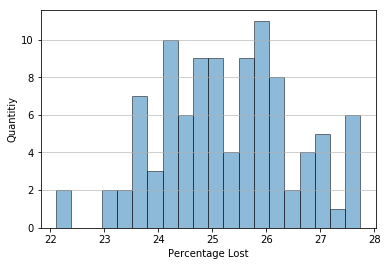

In [12]:
plt.hist(compressed_percentage, bins = 20, alpha = .5, edgecolor = "black", linewidth = 1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Percentage Lost")
plt.ylabel("Quantitiy")

### To end the test, lets calculate the mean from all of the compressions

In [13]:
sum(compressed_percentage) / len(compressed_percentage)

25.26779517323364